# Grant applications: NSERC's Awards Data


The Natural Sciences and Engineering Research Council of Canada (NSERC) is a Government of Canada agency that provides grants for research in the natural sciences and in engineering.

NSERC supports postsecondary students and postdoctoral fellows in their advanced studies. The agency promotes discovery by funding postsecondary professors and students and fosters innovation by encouraging Canadian companies to participate and invest in postsecondary research and training.

In this study, I am going to use datasets containing information about several aspects of the grants given by NSERC since 1991. The insights provided through this study will help NSERC itself at the first place to review the programs, policies and guidelies. The results will also benefit the institutions, companies, university and colledge professor and all researchers all around the world, especially in Canada to assess their importance of research, and to identify the trends. It will help them in their futue choice of research or even the place they want to excecute the research.

This study will be just a quick but importnat piece of a bigger projects to review grant/awards applications in Canada, USA and around the world.

## Data sources

The data is acessible from open data portal of government of Canada.

http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e <br>
We start with the 2017 Awards dataset, which is named NSERC_GRT_FYR2016_AWARD.csv

The very fisr step in any data analysis is to get familiar with our data. As clearly indicated in the website, the data set is a comma separated file (csv), so we can read it in Python using Pandas library. Let's first import Pandas and read the file in using this module. 

In [7]:
import pandas as pd
awards2016=pd.read_csv('NSERC_GRT_FYR2016_AWARD.csv', encoding = 'ISO-8859-1')
awards2016.head()

,Cle,Name-Nom,Department-Département,OrganizationID,Institution-Établissement,ProvinceEN,ProvinceFR,CountryEN,CountryFR,FiscalYear-Exercice financier,...,ResearchSubjectGroupFR,ResearchSubjectEN,ResearchSubjectFR,installment,Partie,Num_Partie,Nb_Partie,ApplicationTitle,Keyword,ApplicationSummary
0,594249,"Aagaard, Mark",Electrical & Computer Engineering,33,University of Waterloo,Ontario,Ontario,CANADA,CANADA,2016,...,Technologie de l'information,Computer hardware,Matériel informatique,05-May,5,5.0,5.0,Model-driven development of pipelined systems,NSERC,Pipelining is a widely used performance optimi...
1,602341,"Aamodt, Tor",Electrical and Computer Engineering,2,University of British Columbia,British Columbia,Colombie-Britannique,CANADA,CANADA,2016,...,Non disponible,Not available,Non disponible,03-Jan,1,1.0,3.0,Energy-Efficient Programmable Accelerators,NSERC,No summary - Aucun sommaire
2,615919,"Aamodt, Tor",Electrical and Computer Engineering - Electric...,2,University of British Columbia,British Columbia,Colombie-Britannique,CANADA,CANADA,2016,...,Technologie de l'information,Distributed and parallel processing,Traitement réparti et simultané,05-Jan,1,1.0,5.0,Energy-Efficient Programmable Accelerators,NSERC,For 50 years computing systems have benefited ...
3,604464,"Aarab, Azzouz",Génie chimique et génie biotechnologique,68,Université de Sherbrooke,Québec,Québec,CANADA,CANADA,2016,...,Génie chimique,Chemical engineering,Génie chimique,NaN,0,NaN,NaN,Caractérisation des oligomères de cellulose,NSERC,No summary - Aucun sommaire
4,599296,"Aaron, Jordan","Earth, Ocean and Atmospheric Sciences",2,University of British Columbia,British Columbia,Colombie-Britannique,CANADA,CANADA,2016,...,Génie civil,Geotechnical engineering (including engineerin...,Géotechnique (y compris génie géologique),NaN,0,NaN,NaN,Improvement and Calibration of an Existing Lan...,NSERC,No summary - Aucun sommaire


Note, if you don't include **encoding='ISO-8859-1'** in the read_csv command, you will get an error as below: <br>
'utf-8' codec can't decode byte 0xe9 in position 12: invalid continuation byte 

This is because the file contains French characters that cannot be decoded by utf-8 codec. read_csv takes an encoding option to deal with files in different formats. In this case we use read_csv('file', encoding = "ISO-8859-1"). You can also use the alias 'latin1' instead of 'ISO-8859-1'.

The data set has 37 columns, as you can see below the table above. Let's find more information about this data set. We can do it by using .info() attribute. The data set has 25116 rows (data entries).

In [8]:
awards2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25116 entries, 0 to 25115
Data columns (total 37 columns):
Cle                                  25116 non-null int64
Name-Nom                             25116 non-null object
Department-Département               25097 non-null object
OrganizationID                       25116 non-null int64
Institution-Établissement            25116 non-null object
ProvinceEN                           24944 non-null object
ProvinceFR                           24944 non-null object
CountryEN                            25116 non-null object
CountryFR                            25116 non-null object
FiscalYear-Exercice financier        25116 non-null int64
CompetitionYear-Année de concours    25116 non-null int64
AwardAmount                          25116 non-null int64
ProgramID                            25116 non-null object
ProgramNaneEN                        25116 non-null object
ProgramNameFR                        25116 non-null object
GroupEN    

This data set displays the NSERC award winners from different universities around Canada. So it would be interesting to get some statistics from it. For example we can answer the questions below by just looking into this data set. No machine learning yet!

* Who won the biggest NSERC award in 2016? From which university and for what project?
* What university/province study has raised more money from NSERC?
* What are the top fields of study that attrachcted the NSERC awards?

Let's find out the answers. The first thing, we'd like to know who won the biggest award, how much was it, and the affiliations. The code below displays the entire row of the data set where the variable 'AwardAmount', which is the amount of award is maximum. We can also use nlargest attribute to see n largest awards. Assumming we are interested in the 3 largest amounts:

As we see below, **Ian McWalter** from **Queen's University** in Ontaro has won the largest amount of awards in 2016, with amount of **$8470297**.

In [23]:
print('The maximum award that was given in 2016 was: $',awards2016['AwardAmount'].max())
#awards2016[awards2016['AwardAmount']==awards2016['AwardAmount'].max()]
print('The top three awards given:\n',awards2016.nlargest(3,'AwardAmount').AwardAmount)
awards2016.nlargest(3,'AwardAmount')
#awards2016.sort('AwardAmount', ascending=False)
# To sort the data frame based on AwardAmount values.

The maximum award that was given in 2016 was: $ 8470297
The top three awards given:
 15066    8470297
7117     7205799
9337     6919039
Name: AwardAmount, dtype: int64


,Cle,Name-Nom,Department-Département,OrganizationID,Institution-Établissement,ProvinceEN,ProvinceFR,CountryEN,CountryFR,FiscalYear-Exercice financier,...,ResearchSubjectGroupFR,ResearchSubjectEN,ResearchSubjectFR,installment,Partie,Num_Partie,Nb_Partie,ApplicationTitle,Keyword,ApplicationSummary
15066,595897,"McWalter, Ian",Head Office,29,Queen's University,Ontario,Ontario,CANADA,CANADA,2016,...,Non disponible,Not available,Non disponible,08-Jul,7 & 8,NaN,8.0,Microsystems and Nanotechnology: Enabling Inno...,NSERC,No summary - Aucun sommaire
7117,617718,"Forrest, Tracey",NaN,33,University of Waterloo,Ontario,Ontario,CANADA,CANADA,2016,...,Technologie de l'information,Information technology,Technologie de l'information,NaN,0,NaN,NaN,Transformative Quantum Technologies,CRC,No summary - Aucun sommaire
9337,617723,"Hayter, Nancy",NaN,79,Dalhousie University,Nova Scotia,Nouvelle-Écosse,CANADA,CANADA,2016,...,Océanographie,Oceanography,Océanographie,NaN,0,NaN,NaN,Ocean Frontier Institute,CRC,No summary - Aucun sommaire


It would be nice if we can look at the distribution of the awards amount. First, we can see the **statistics** by using .describe() attribute of the data frame. Then we can make a **histogram**.

In [18]:
awards2016['AwardAmount'].describe()

count    2.511600e+04
mean     4.547167e+04
std      1.682855e+05
min      0.000000e+00
25%      1.202325e+04
50%      2.500000e+04
75%      4.000000e+04
max      8.470297e+06
Name: AwardAmount, dtype: float64

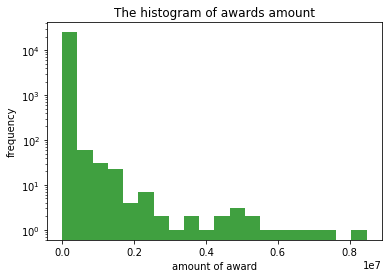

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(awards2016['AwardAmount'], 20, facecolor='green', log='True',alpha=0.75)
plt.title('The histogram of awards amount')
plt.xlabel('amount of award')
plt.ylabel('frequency')
plt.show()
#awards2016['AwardAmount'].hist(by)

As you see above, the histogram apparantly has one large pick around 0. If you look again to the award statistics obtained using .describe() attribute, you would easily notice that the top three awards that we reported earlier, were kind of outliers. We are not yet completely sure those awards are outliers, but from statistics it is clear that mean is around 40,000, and 75 percentile is also about 40,000. Therefore, a large majority of the awards were actually less tham Dollars 40,000 dollars. So let's find out how many awards were actually larger than $100,000.

In [51]:
sum(awards2016['AwardAmount']>100000)/len(awards2016)*100

7.1786908743430482

**These were based on individual grants, but one person could be awarded multiple grants.**

From above, we know the the total number of entries in this data set (total number of grants) are 25,116. But the total number of awardees are 19, 519. Therefore, we can look at the total amount per person, not just the entries.

In [79]:
len(awards2016['Name-Nom'].unique())

19519

### The awards amount for each institution
The awards are distributed between different universities. This distribution, however, is not uniform; some institutions/universities receive a larger piece for many reason. It could be because of their number of students, its reputation, the location, etc. 

Here, using a grouby method, we can find the amount of awards each institution recevied in 2016, and then sort the result. As seen in table below, the top 3 universities that recevie larger amount of awards are:
* University of Toronto
* University of British Columbia
* University of Alberta

In [100]:
(
awards2016['AwardAmount'].groupby(awards2016['Institution-Établissement']).sum()
    .reset_index().sort_values('AwardAmount', ascending=False).head()
    )

,Institution-Établissement,AwardAmount
1044,University of Toronto,95318581
982,University of British Columbia,83680562
978,University of Alberta,70730510
1047,University of Waterloo,67742832
605,McGill University,59256410


Belowe, you can see that we are able to use groupby method in a different way. Here we calculate the number (count) of awards as well as the amount of awards for each university.

In [129]:
aggregations = {
   #'AwardAmount':'count'#,
    'AwardAmount':['sum','count']
    #'AwardAmount':'sum'
    #'AwardAmount': lambda x: sum(x)
}
awards2016_by_institution=awards2016.groupby('Institution-Établissement',as_index=False).agg(aggregations).sort_values([('AwardAmount','sum')], ascending=False)
                                                                                    #There are two levels: awardAmount -> count, sum
awards2016_by_institution.head(10)    

Institution-Établissement AwardAmount      
                                             sum count
1044           University of Toronto    95318581  2005
982   University of British Columbia    83680562  1674
978            University of Alberta    70730510  1309
1047          University of Waterloo    67742832  1362
605                McGill University    59256410  1239
1057                Université Laval    49097066   827
780               Queen's University    41131815   560
1049   University of Western Ontario    38080271   777
1032      University of Saskatchewan    36847917   492
983            University of Calgary    36751730   764

We can also plot a pie chart to see the percentage of total amounts for each university. In this Figure the top 15 institutions wre ploted in this pie chart. 

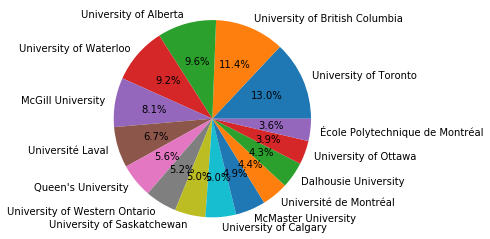

In [144]:
plt.pie(awards2016_by_institution[('AwardAmount','sum')][:15], labels=awards2016_by_institution['Institution-Établissement'][:15],autopct='%1.1f%%' )
 plt.axis('equal')
plt.show()

### Awards 2016 for different provinces
We can also conduct the same calculations to find out the amount of awards for each provice. As you see below, these 4 provices of Ontario, Quebec, British columbia and Alberta recevied 40, 25 and 12.5%, and 10.5% of total awards (by amount) respectively. These 4 provinces took almost 86% of total awards.

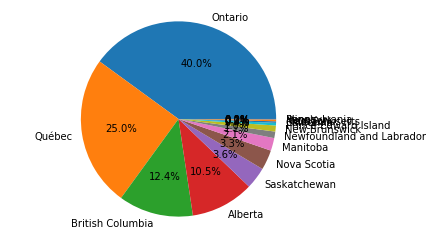

In [146]:
Awards2016_by_province=awards2016.groupby('ProvinceEN',as_index=False).agg({'AwardAmount':['sum','count']}).sort_values([('AwardAmount','sum')], ascending=False)
                                                                                    #There are two levels: awardAmount -> count, sum
plt.pie(Awards2016_by_province[('AwardAmount','sum')][:15], labels=Awards2016_by_province['ProvinceEN'][:15],autopct='%1.1f%%' )
plt.axis('equal')
plt.show()

### Awards2016 by ResearchSubjectGroup
It is interesting to see which research subject recevied the highest amount of grants. Some subjects are unavailable, but besides that "Electrical and electronic engineering", "Information technology, and "Physics" are the top 3.

In [137]:
aggregations = {
   #'AwardAmount':'count'#,
    'AwardAmount':['sum','count']
    #'AwardAmount':'sum'
    #'AwardAmount': lambda x: sum(x)
}
Awards2016_by_ResearchSubjectGroup=awards2016.groupby('ResearchSubjectGroupEN',as_index=False).agg(aggregations).sort_values([('AwardAmount','sum')], ascending=False)
                                                                                    #There are two levels: awardAmount -> count, sum
Awards2016_by_ResearchSubjectGroup['% Total']=Awards_by_ResearchSubjectGroup[('AwardAmount','sum')]/Awards_by_ResearchSubjectGroup[('AwardAmount','sum')].sum()   
Awards2016_by_ResearchSubjectGroup.head(15)    

ResearchSubjectGroupEN AwardAmount        \
                                                              sum count   
37                                      Not available   111947948  1205   
15              Electrical and electronic engineering    71979046  1608   
28                             Information technology    70330882  1921   
44                                            Physics    64860117   988   
17                              Evolution and ecology    61638939  1541   
31                   Materials science and technology    53409394   950   
32                             Mechanical engineering    40527194  1171   
2                                      Animal biology    38729871  1139   
10                               Chemical engineering    35099247   764   
47                                         Psychology    32181223  1007   
8                              Biomedical engineering    31143923   804   
14                                      Earth science    29827538   538   
11                                  Civil engineering    28540175   743   
41  Other studies in natural sciences and engineering    26071512    63   
45                              Plant and treebiology    23969937   462   

     % Total  
              
37  0.155428  
15  0.099935  
28  0.097647  
44  0.090051  
17  0.085579  
31  0.074153  
32  0.056268  
2   0.053772  
10  0.048732  
47  0.044680  
8   0.043240  
14  0.041412  
11  0.039625  
41  0.036198  
45  0.033280

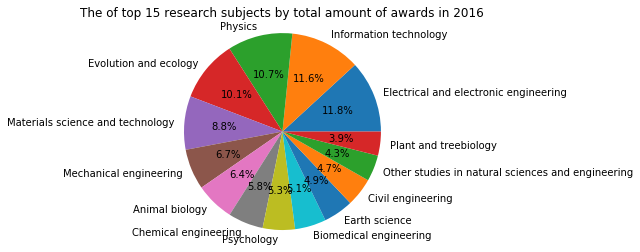

In [451]:
# Plot
%matplotlib inline
plt.pie(Awards2016_by_ResearchSubjectGroup[('AwardAmount','sum')][1:15], labels=Awards2016_by_ResearchSubjectGroup['ResearchSubjectGroupEN'][1:15],autopct='%1.1f%%' )
 
plt.axis('equal')
plt.title('The of top 15 research subjects by total amount of awards in 2016')
plt.show()

### Awards per Program
We can find the amount of awards for each program names. As we see below
* Discovery grants program
* University Undergraduate student research awards
* Experience awards (previously industrial undergraduate student research awards)
are the most 3 programs that recevied 65% of all awards. (here I used groupby and the awards are based on numbers not total.
by count not sum

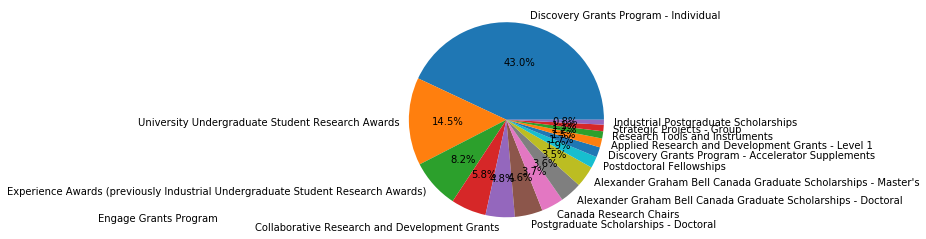

In [205]:
Awards2016_by_program=(awards2016.groupby('ProgramNaneEN',as_index=False).agg({'AwardAmount':'count'}).sort_values('AwardAmount', ascending=False)
.rename(columns={'AwardAmount':'No_of_awards'})
                       )
plt.pie(Awards2016_by_program['No_of_awards'][:15], labels=Awards2016_by_program['ProgramNaneEN'][:15],autopct='%1.1f%%' )
plt.axis('equal')
plt.show()

### Area of application
It might be interesting to look at the area of application for ech awards. That would give you an insight about what sections of science are more attractive or better to say receive more fundings. This is a valid argument for research subject as well- which was considered above. These are the things help us to figure out what the hot topics nowadays? What area of application is seen as a good place for investment.

Well, similar to our analysis above, let's plot the amount of awards for each area of application.

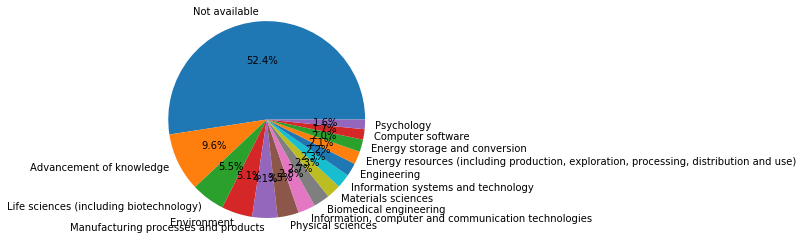

In [147]:
Awards2016_by_area_application=awards2016.groupby('AreaOfApplicationEN',as_index=False).agg({'AwardAmount':['sum','count']}).sort_values([('AwardAmount','sum')], ascending=False)
                                                                                    #There are two levels: awardAmount -> count, sum
plt.pie(Awards2016_by_area_application[('AwardAmount','sum')][:15], labels=Awards2016_by_area_application['AreaOfApplicationEN'][:15],autopct='%1.1f%%' )
plt.axis('equal')
plt.show()

### Missing Values
There is a great amount of NAs (>50%). Why is this? Is there anything that we don't know or we should know? We should find out whre these missing values are stemming from.

First, I am going to look at the "program names" of the entries that their area of application is reported as *Not available. <br> 
*In the code below, first, I slice the data frame to keep only entries where awards2016['AreaOfApplicationEN']=='Not available',
and then use groupby to find the prograsm with the most number of unavailable area of applications. It seems that they are from several programs, but is there anything in common with this programs? I can say there are many undergrad, graduate and postgraduate awards among them. <br> 
The table below shows only the first 5 top programs as I used .head() attribute.

In [204]:
(
awards2016[awards2016['AreaOfApplicationEN']=='Not available'][['ProgramNaneEN','GroupEN','AreaOfApplicationEN']]
    .groupby(['ProgramNaneEN'],as_index=False).agg({'AreaOfApplicationEN':'count'}).sort_values('AreaOfApplicationEN', ascending=False)
    ).rename(columns={'AreaOfApplicationEN': 'Not available Area of application'}).head()

,ProgramNaneEN,Not available Area of application
60,University Undergraduate Student Research Awards,3286
35,Experience Awards (previously Industrial Under...,1843
51,Postgraduate Scholarships - Doctoral,1044
10,Canada Research Chairs,835
1,Alexander Graham Bell Canada Graduate Scholars...,818


### Can we find a clue in program groups, instead of program names? 
Here, the program groups (column GroupEN), may be a better choice to find out the cause for unavailability of the applications are. So this time, we should group by "GroupEN"  

In [182]:
(
awards2016[awards2016['AreaOfApplicationEN']=='Not available'][['ResearchSubjectGroupEN','ProgramNaneEN','GroupEN','AreaOfApplicationEN']]
    .groupby(['GroupEN'],as_index=False).agg({'AreaOfApplicationEN':'count'}).sort_values('AreaOfApplicationEN', ascending=False)
    ).rename(columns={'AreaOfApplicationEN': 'Not available Area of application'})

,GroupEN,Not available Area of application
2,Training programs,8960
0,Discovery grants programs,1738
1,Research partnerships programs,463


**Interesting!** The entries with unavialable area of applications are from only these 3 Groups (note that groups indicating the type of programs):
    * Training programs
    * Discovery grants program
    * Research partnerships programs

But the question is that whether every single entry of these 3 programs have unavailavle area of application?
So apparantly, the area of application is unavailable for student awards (undergraduate, postgraduate, postdoctoral, Graham Bell, etc.) But how can we make sure that all awards from this students category has no area of application. I mean, let say for undergraduate award, there might be some awards with given availabe area of application and some without that.
I am going to write the same code as above but for entries that area of application is available (i.e. is not unavailable.)
awards2016['AreaOfApplicationEN']!='Not available'   
    

In [196]:
(
awards2016[awards2016['AreaOfApplicationEN']!='Not available'][['ResearchSubjectGroupEN','ProgramNaneEN','GroupEN','AreaOfApplicationEN']]
    .groupby(['GroupEN'],as_index=False).agg({'AreaOfApplicationEN':'count'}).sort_values('AreaOfApplicationEN', ascending=False)
    ).rename(columns={'AreaOfApplicationEN': 'available Area of application'})

,GroupEN,available Area of application
0,Discovery grants programs,10404
1,Research partnerships programs,3551


Well, we see there is no entry from "Trainig program" Group that has available area of application. Therefore, we can at least say that
* all entries listed under "Traing programs" has unknow area of application, or perhaps it was not required to specified in the application forms; and
* 8960/(8960+1738+463)=80.3% of area of applications are unknown because they are classified as "Training programs".There are some entries from the other 2 groups, but the area of application was not revealed for some reason. 

#### Box plot
For a better visualization, I am going to plot the awards amount for each group. However, I will differentiate between the ones with available area of application with those without area of application. This will be implemented by creating a new column that contains either 0 or 1. If area of application is available, it takes 1, otherwise it would be 0. I basicly check whether 'AreaOfApplicationEN'!='Not available'. The result of this would be boolean ('True' or 'False'). With astype(int), I convert the booleans to 0 and 1 (False is 0 and True is 1). Note, I first make a copy of the awards2016 dataset, and then add the column to the copy since I don't want to change the original dataset yet.   <br>

Then I use seaborn package, which is a wrapper for matplotlib to make a boxplot. But note that 1) the plots are colored by availibility of application area. hue="is_area_of_application_available" 2) As already mentioned, the amount of awards has outliers in the order of 1e7, while the most of the awards are less than 50,000. Here boxplot shows this again. But be aware that I have removed the outliers here, as the boxplot would not be visible if outliers are allowed to be present. <br>
The outliers have been removed from plot by setting showfliers=False. Try to set it True to see the long tails. 

Now what we see here in the boxplot confirms the fact that all awards classified as "Training programs" have no area of application.

**Note: visit these 2 links for great examples of seaborn plots** <br>
http://seaborn.pydata.org/tutorial/categorical.html <br>
https://seaborn.pydata.org/tutorial/axis_grids.html

([<matplotlib.axis.XTick at 0x47e3e0b8>,
 <a list of 3 Text xticklabel objects>)

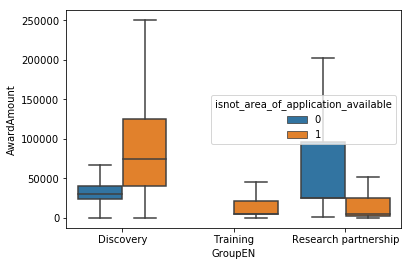

In [230]:
import seaborn as sns

temp=awards2016.copy()
temp['is_area_of_application_available']=(temp['AreaOfApplicationEN']!='Not available').astype(int)
sns.boxplot(x="GroupEN", y="AwardAmount", hue="is_area_of_application_available", data=temp,showfliers=False);
                                                                                                #sym=''
plt.xticks([0,1, 2], ['Discovery','Training', 'Research partnership'])  


## The prediction of awards for next years
Here, we get to the most exciting part: prediction!

So far, we got familiar with the data set and did a pretty good data exploratory analysis. However, it would be great if we can get recognize the trends, and perhaps make predictions about future awards. <br>

The website from which I downloaded the 2016 data, also include the data for other years. It is in fact contains the data form 1991. Having said that, now we are dealing with time series data if we put together all sets from different years. Time series data are very common in multiple sectors such as economics. I am going to download the data set and use them in my analysis. <br> Just a reminder, the data sets are available at http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e

1) Download all data and load them in: Here, instead of downloading all files manually, I am trying to make Python download them all for me.

In [247]:
import requests
def download_awards_file(file_name):
    url = 'http://www.nserc-crsng.gc.ca/opendata/'+file_name
    print ('downloading data set for year: ',year)
    r = requests.get(url) ## using request module get the file
    f= open(file_name, 'wb')  # open a file with the current file name
    f.write(r.content) # write the file 
    f.close()
years= [year for year in range(1991,2017)]   # a list comprehension to make a list of years; files are available from 1991 to 2016
file_names=[]    
for year in years:
    file_name='NSERC_GRT_FYR'+str(year)+'_AWARD.csv'
    file_names.append(file_name)
    download_awards_file(file_name)

downloading data set for year:  1991
downloading data set for year:  1992
downloading data set for year:  1993
downloading data set for year:  1994
downloading data set for year:  1995
downloading data set for year:  1996
downloading data set for year:  1997
downloading data set for year:  1998
downloading data set for year:  1999
downloading data set for year:  2000
downloading data set for year:  2001
downloading data set for year:  2002
downloading data set for year:  2003
downloading data set for year:  2004
downloading data set for year:  2005
downloading data set for year:  2006
downloading data set for year:  2007
downloading data set for year:  2008
downloading data set for year:  2009
downloading data set for year:  2010
downloading data set for year:  2011
downloading data set for year:  2012
downloading data set for year:  2013
downloading data set for year:  2014
downloading data set for year:  2015


Now, all data sets are downloaded. The first thing we can do is to see whether or not the total amounts of awards are growing over the past years. The growth rate is in fact a good measure of how important the research is in a country like Canada. Of course, there are several other factors such as number of publications and final applications resulted from all researches funded and promoted by these awards, but here let's just forget others and focus on these datasets. But we aknowledge that this study presented here is an important piece of a bigger projects that are implimented by large firms. In a large project, this study will be combined with others to draw a bigger picture. 

### Total amount of awards given each year
2) After downloading all datasets in part 1, let's look at the total amount of awards given each year. <br>
First, we read all datasets in for loop, all loading to a dataframe. For each, the total amount of awards in a year (using awards['AwardAmount'].sum() command), total number of awards each year, and standard deviation (using numpy.std) are calculated and stored in lists: yearly_amount_of_awards, yearly_number_of_awards, and yearly_std, respectively. <br>

Then using matplotlibe with 2 subplots, each plotting two curves with separate y-axis, and shared x-axis (using  axis.twinx()), we plot the time series of total amount and number of awards vs. year (left figure) and average amount of awards, and standard deviation vs. years (right figure).

C:\Users\Mehdi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


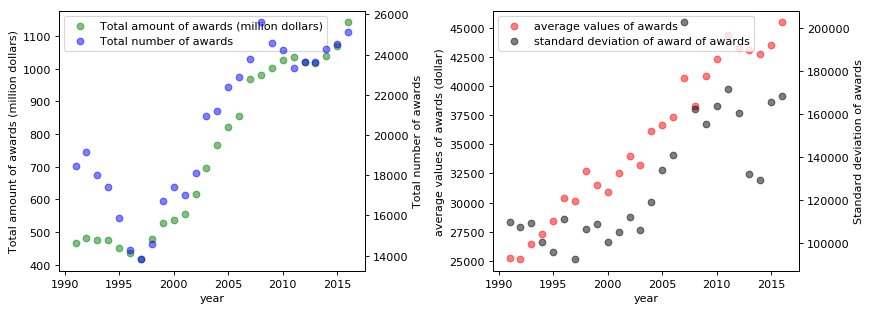

In [282]:
yearly_amount_of_awards=[]
yearly_number_of_awards=[]
yearly_std=[]
for file_name in file_names:
    awards=pd.read_csv(file_name,encoding = 'ISO-8859-1')
    yearly_amount_of_awards.append(awards['AwardAmount'].sum()/1.e6) # Total amount of awards each year
    yearly_number_of_awards.append(len(awards)) # Number of awards each year
    yearly_std.append(np.std(awards['AwardAmount']))

fig2 = plt.figure(num=2, figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k') # Create matplotlib figure

ax1 = fig2.add_subplot(121) # Create matplotlib axes
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax1.

lns1=ax1.scatter(x=years, y=yearly_amount_of_awards, c="green", alpha=0.5, label='Total amount of awards (million dollars)')
lns1=ax2.scatter(x=years, y=yearly_number_of_awards, c="blue", alpha=0.5, label='Total number of awards')

ax1.set_ylabel('Total amount of awards (million dollars)')
ax2.set_ylabel('Total number of awards')
ax1.set_xlabel('year')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

ax3 = fig2.add_subplot(122) # Create matplotlib axes
ax4 = ax3.twinx() # Create another axes that shares the same x-axis as ax3
lns3=ax3.scatter(x=years, y=np.array(yearly_amount_of_awards)/np.array(yearly_number_of_awards)*1e6, c="red", alpha=0.5, label='average values of awards')
lns4=ax4.scatter(x=years, y=yearly_std, c="black", alpha=0.5, label='standard deviation of award of awards')
ax3.set_ylabel('average values of awards (dollar)')
ax4.set_ylabel('Standard deviation of awards')
ax3.set_xlabel('year')
h3, l3 = ax3.get_legend_handles_labels()
h4, l4 = ax4.get_legend_handles_labels()
ax3.legend(h3+h4, l3+l4, loc=2)
fig2.tight_layout() # To adjust the space between two plots, otherwise they may overlap
# alternativelu, you can adjust by subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
plt.show()


As seen in the right figure, the total number of awards decresed from about 190000 awards in 1991 to around 14000 awards in 1997. In this period of time, the total amount of awards decreased slightly, but only from about 480 to around 450 million dollards. This shows that from 1991 to 1997, the funding agency was planning to increase the average amount of awards per person (i.e. quality of awards instead of quantity of awards). As a researcher, when it was the time to apply for a new award or renew your past ones, you could probably apply for a larger award. This is confirmed by the plots shown in the right figure (red dots). <br> 

From right figure, we also see that from 1991 to 1997, the standard deviation was decreasing. This illustrates that NSERC as a government funding agency, was quite strict on the guidelines; I mean they didn't show that they might like a few number of projects a lot more than the others such that they might give huge amounts of fundings to those faviorte ones (there were some but compare them with now). However, over the past 10 years, that attitude changed. It is clear now, awards are given that are a lot larger than average ones. Look at the standard deviations. The standard deviation in 2016 is about 180,000 dollars when the average is about 40,000. We showed it earlier that the maximum amount of award was about 8.5 million dollar. Comapre this with the average (40,000 dollar). It is about 200 times larger than average!!!.

So in the past years NSERC is actually growing an interest to fund in massive projects, despite the fact that it still is supporting the small projects too as the total number, total amount of awards and average amount of awards kept growing since 1997. But i am saying that the standard deviation is growing as well, therefore more and more large projects!      


## How about research subjects?
as you see from dataset, NSERC is funding 57 research subjects. As shown earlier, in 2016, the top 3 research subjects were: 1)Electrical and electronic engineering, 2) Information technology, and 3) Physics.
But there are 54 other subjects, that we might be interested to see how NSERC is supporting them. Is there any subject that showed a tremendous growth? any new subject at all? Or is there any subject that is loosing government support in the past years?

In this section, we read the datasets (csv files) one by one; everytime the data set is read into a data frame, we group-by research subject and sum the awardamount for each group. We sort them as well so we can get the top research subject of each year and keep them in a list (Top_research_subjects) in case it may be usefule lateron.

All the research subject of each year are also kept in another list (research_subjects) to finally identify the entire set of research subjrcts(all_research_subjects); this is because over the years, the research subjects that were recognized and funded by NSERC may be changing. As you can easily see some years have 56, and some years have 57 subjects. As another example, you will see that some research subjects such as "Engineering systems" have just considered for funding recently. Therefore, we need to identify all the subjects at the end when we read all data sets of all years. Here, to avoid repeatation, everytime we read a data set we make a dictionary of research subjects for pair of (subject: award amount) and keep that dictionary in a list for all years(award_for_subjects).

In [367]:
Top_research_subjects=[]
award_for_subjects=[]
research_subjects=[]


for file_name in file_names:
    awards=pd.read_csv(file_name,encoding = 'ISO-8859-1')
    Awards_by_ResearchSubjectGroup=awards.groupby('ResearchSubjectGroupEN',as_index=False).agg({'AwardAmount':'sum'}).sort_values('AwardAmount', ascending=False)
    Top_research_subjects.extend(Awards_by_ResearchSubjectGroup['ResearchSubjectGroupEN'][:5]) #the top 5 subjects of each year is kept
    research_subjects.extend(Awards_by_ResearchSubjectGroup['ResearchSubjectGroupEN'])
    award_for_subjects.append( # the amounts of awards for all subjects are stored in a dictionary for each year.
                                {key: value for (key, value) in
     zip(Awards_by_ResearchSubjectGroup['ResearchSubjectGroupEN'],Awards_by_ResearchSubjectGroup['AwardAmount'])}
                                 )

all_time_top_res=list(set(Top_research_subjects)) # To make a list of uniqe subjects
all_research_subjects=list(set(research_subjects)) 



C:\Users\Mehdi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)




Now, we have dictionarys of awards subjects: awards amount for each year in a list, so we can make a data frame as you see below. It will help us plot the data. we also drop the "Not available" subject.

In [417]:
#carat = [5, 10, 20, 30, 5, 10, 20, 30, 5, 10, 20, 30]
#price = [100, 100, 200, 200, 300, 300, 400, 400, 500, 500, 600, 600]
#color =['D', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'F', 'G', 'G', 'G',]
#df565 = pd.DataFrame(dict(carat=carat, price=price, color=color))


d={subject:[] for subject in all_research_subjects }    # Using Dictionay comprehension to make a defeault dictionary 

for dict_of_awards in award_for_subjects: #list of dicts
    for subject in all_research_subjects:
    
        if subject in dict_of_awards:
            d[subject].append(dict_of_awards[subject])
        else:
            d[subject].append(0)   # put 0 if the subject was not in that year (was not awarded)
df_award_per_subject=pd.DataFrame(d,index=years) # setting years as index
df_award_per_subject.drop('Not available',1,inplace=True) # droping NAs
df_award_per_subject.head()

,Agricultural engineering,Analytical chemistry,Animal biology,Applied mathematics,Artificial intelligence,Astronomy and astrophysics,Atmospheric science,Biochemistry,Biomedical engineering,Cell biology,...,Psychology,Pure mathematics,Robotics,Social sciences and humanities,Soil science,Space science,Statistics and probability,Structural engineering,Systems engineering,Theoretical physics and chemistry
1991,899768,3964853,21397194,3656491,3125013,5276126,3489576,7745394,3691997,3488928,...,11992400,8136515,1820301,0,2215633,1698762,4664019,7078278,0,5137877
1992,1118966,3365017,17247337,4228030,3560268,5608971,4107484,7654319,3504962,4712632,...,13438938,9478912,2761363,0,1693518,1398057,4915093,7971356,0,5675524
1993,1455935,3427015,14125414,4096673,3428402,7834856,3365171,7193204,3596631,5417043,...,13016109,9351815,3594976,0,2164857,1903553,5051833,6910844,0,5415196
1994,1328665,3376433,13713809,4038825,3209365,5536831,3083508,7972817,4392267,5795804,...,12596220,9360098,3443050,0,1851550,1936492,4701740,8482296,0,6778065
1995,1398052,3962027,13469471,3733537,2914441,5210466,3145623,8068011,4239230,6336036,...,12443893,9001371,3464573,0,1551720,2449359,4624109,7604256,0,5447165


### Plotting the total awards for each subjects over years

Now it is time to plot the amount of awards given to a research subject over years from 1991 to 2016. We are going to plot the amonut of award on y-axis and year on the x-axis. Now we have a few options:

#### 1) Plot multiple curves in one plot with seaborn.factorplot
If we want to plot multiple curves in one plot, we may use seaborn factorplot, but we should first use melt for reshape; see example in the link below: <br>
https://stackoverflow.com/questions/44941082/plot-multiple-columns-of-pandas-dataframe-using-seaborn

This option may not be a good idea as we have 57 subjects. Plotting 57 curves in a single plot would be useless!

#### 2) Using for loops and plt.subplots to plot 57 subplots
We can plot every subject in a separate plot. This could be done using the same procedure shown earlier in this notebook. Although, we need a for loop to draw all 57 plots. Look into the link below to get the idea; <br> 
https://stackoverflow.com/questions/46373321/python-plotting-by-different-dataframe-columns-using-seaborn

Although, this way works, but ss we have shown this before, let's try something different, just to learn more. So I am going to introduce seabon FactGrid.

#### 3) Plot multiple plots quickly with Seaborn FacetGrid
Let's try a neat and awesome way to plot multiple graphs. Here we have a data frame, so to use FactGrid we should melt it first. You may see how it is implemented below. <br>
Look at the link below for several examples of Seaborn FacetGrid.

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

In [418]:
# need years that are index here to be in a column
df=df_award_per_subject.copy()
df.reset_index(level=0, inplace=True)
df.rename(columns={'index':'year'},inplace=True)
# we melt the dataframe
df = df.melt('year', var_name='subj',  value_name='amn_vals')
df.head()

,year,subj,amn_vals
0,1991,Agricultural engineering,899768
1,1992,Agricultural engineering,1118966
2,1993,Agricultural engineering,1455935
3,1994,Agricultural engineering,1328665
4,1995,Agricultural engineering,1398052


After melting data frame, it is ready to make use of seabon FacetGrid to plot all.

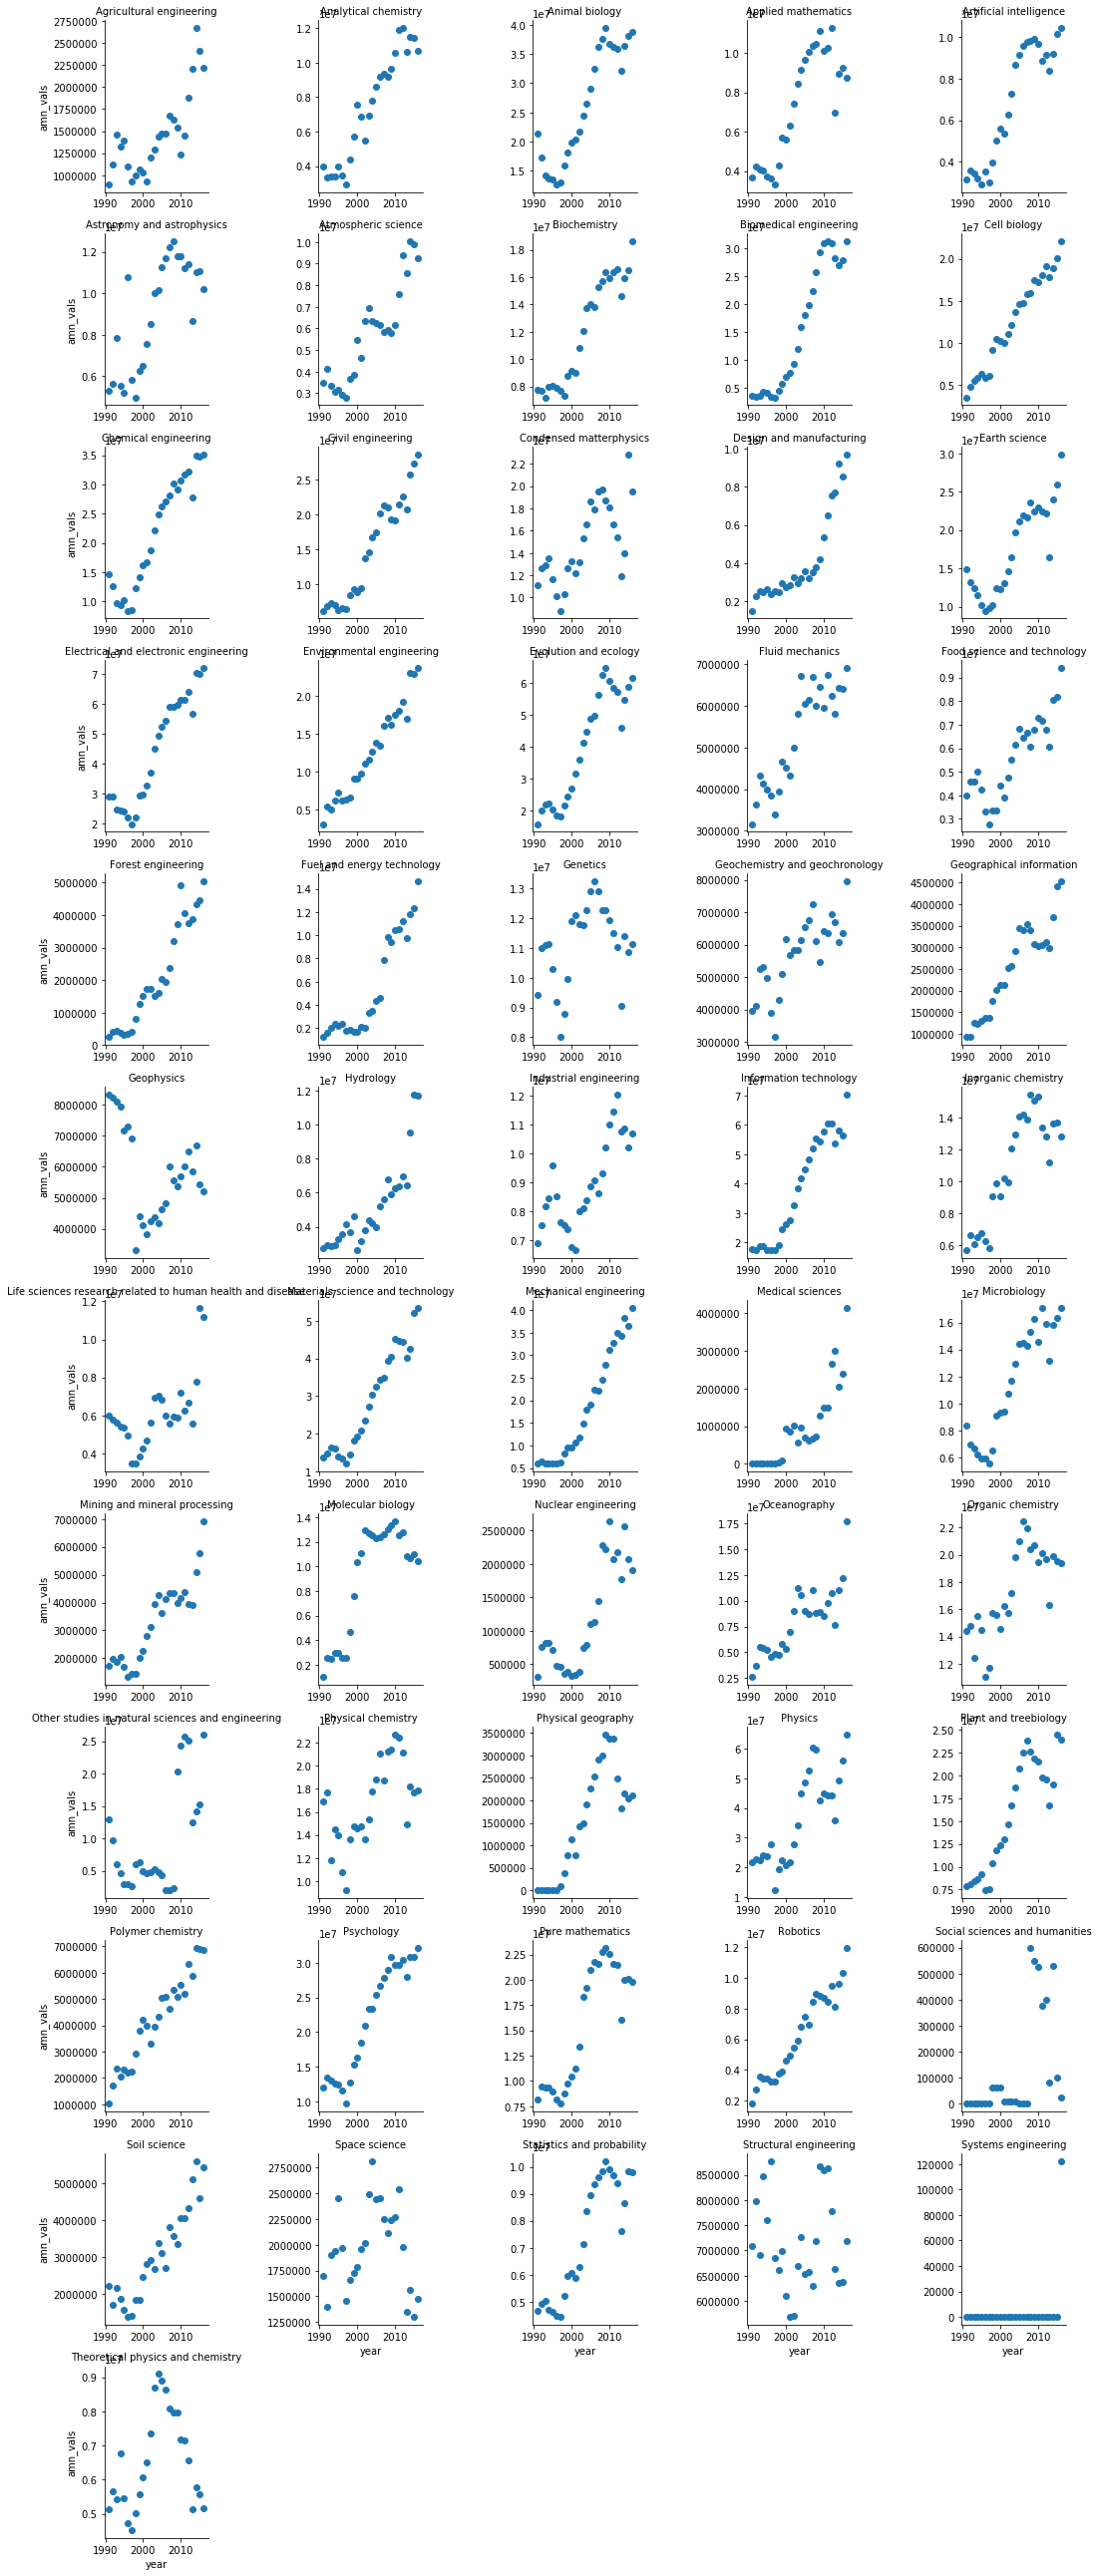

In [429]:
%matplotlib inline
g = sns.FacetGrid(df, col="subj", col_wrap=5,sharey=False,sharex=False)#, size=1.5)
g = g.map(plt.scatter, "year", "amn_vals").set_titles("{col_name}")#, marker=".")

Above, you see 57 graphs (you may need to scroll down to see all plots). Each subject has its own plot. <br>
We can draw intresting insights from this plots: <br>
1) First, the subjects that were attracting awards in the past, but not any more! They no longer attractive; in fact they are probably loosing their importance since the amount of awards for these subjects are decreasing over years; the subjects below are given less amount of funding every year: <br>
* Applied mathematics: since 2013, it has been receiving less funding.
* Pure mathematics since 2000
* Astronomy and astrophysics since 2009
* Space science
* Genetics (2008)
* Inorganic Chemistry (2008)
* Organic chemistry (2005)
* Physical Chemistry (2010)
* Theoretical Physics and Chemistry


2) The subjects that were not so great in the past , but the amounts of awards incresed significantly from a given year: <br>
* Design and manufacturing since 2010
* Biomedical Engineering since 1997
* Information Technology (2000)
* Mechanical Engineering (2000)
* Medical Sciences (2000)
* System engineering; This subject started to receive funding just recently, in fact in 2016!

3) The subjects that used to receive no money, but made a huge change, again they are getting weak: <br>
* Social Sciences and Humanities

4) The subjects that have been awarded very randomly so no trend is observed: <br>
* Structure Engineering

5) The subjects with growing attractivity.

Just note that these are based on dollar amounts; we should see the number of awards given to each subject too.

## The effect of location
Different provinces, maybe due to the universities in them, receive didfferent amount of awards. Let's see how they receive awards over the past 16 years. <br>
In this section, the same analysis is done for province instead of research subject. I expect to see all provinces are receiving a growing amount of awards over the past years. I mean the provinces may receive different amoun to awards, but the rate of increase should be almost the same for all. as I believe the government may want to promote research evenly in all provinces. 

Note, we can do this in the loop used in the last analysis just to avoid repeatation. However, just to make the process clear, we do it separately.

In [435]:
award_for_provinces=[]
award_for_countries=[]
award_for_universities=[]
provinces=[]
countries=[]
universities=[]


for file_name in file_names:
    awards=pd.read_csv(file_name,encoding = 'ISO-8859-1')
    Awards_by_province=awards.groupby('ProvinceEN',as_index=False).agg({'AwardAmount':'sum'}).sort_values('AwardAmount', ascending=False)
    Awards_by_country=awards.groupby('CountryEN',as_index=False).agg({'AwardAmount':'sum'}).sort_values('AwardAmount', ascending=False)
    Awards_by_university=awards.groupby('Institution-Établissement',as_index=False).agg({'AwardAmount':'sum'}).sort_values('AwardAmount', ascending=False)
    
    provinces.extend(Awards_by_province['ProvinceEN'])
    countries.extend(Awards_by_country['CountryEN'])
    universities.extend(Awards_by_university['Institution-Établissement'])
    
    award_for_provinces.append( # the amounts of awards for all subjects are stored in a dictionary for each year.
                                {key: value for (key, value) in
     zip(Awards_by_province['ProvinceEN'],Awards_by_province['AwardAmount'])}
                                 )
    award_for_countries.append( # the amounts of awards for all subjects are stored in a dictionary for each year.
                                {key: value for (key, value) in
     zip(Awards_by_country['CountryEN'],Awards_by_country['AwardAmount'])}
                                 )
    award_for_universities.append( # the amounts of awards for all subjects are stored in a dictionary for each year.
                                {key: value for (key, value) in
     zip(Awards_by_university['Institution-Établissement'],Awards_by_university['AwardAmount'])}
                                 )
    

all_provinces=list(set(provinces)) 
all_countries=list(set(countries))
all_universities=list(set(universities))

C:\Users\Mehdi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [441]:
len(all_universities)

4029

### Country

Look into the countries:

In [443]:
d={country:[] for country in all_countries }    # Using Dictionay comprehension to make a defeault dictionary 

for dict_of_awards in award_for_countries: #list of dicts
    for country in all_countries:
    
        if country in dict_of_awards:
            d[country].append(dict_of_awards[country])
        else:
            d[country].append(0)   # put 0 if the subject was not in that year (was not awarded)
df_award_per_country=pd.DataFrame(d,index=years) # setting years as index
df_award_per_country.head()

,AUSTRALIA,AUSTRIA,BELGIUM,BRAZIL,CANADA,CHILE,CHINA,COLOMBIA,CZECH REPUBLIC,DENMARK,...,SPAIN,SWEDEN,SWITZERLAND,TAIWAN,"TAIWAN, PROVINCE OF CHINA",THAILAND,TURKEY,UNITED KINGDOM,UNITED STATES,UNKNOWN
1991,308846,0,17764,0,454921487,0,0,0,0,60954,...,0,19392,167339,0,0,0,0,1180485,7492894,0
1992,343019,0,0,0,471494798,0,25870,0,0,55744,...,0,5755,147029,0,0,0,0,1219362,7682725,0
1993,222067,0,0,0,465757578,0,0,0,0,58000,...,0,29092,127151,0,0,0,0,1269502,7464833,0
1994,259023,0,0,0,464531502,0,0,0,0,19408,...,20023,61503,160926,0,0,0,0,1343899,6945223,0
1995,287087,0,0,0,441868024,0,8150,0,0,23699,...,41076,12592,115422,0,0,0,0,1103007,6894066,0


Using seaborn FacetGrid to plot graphs


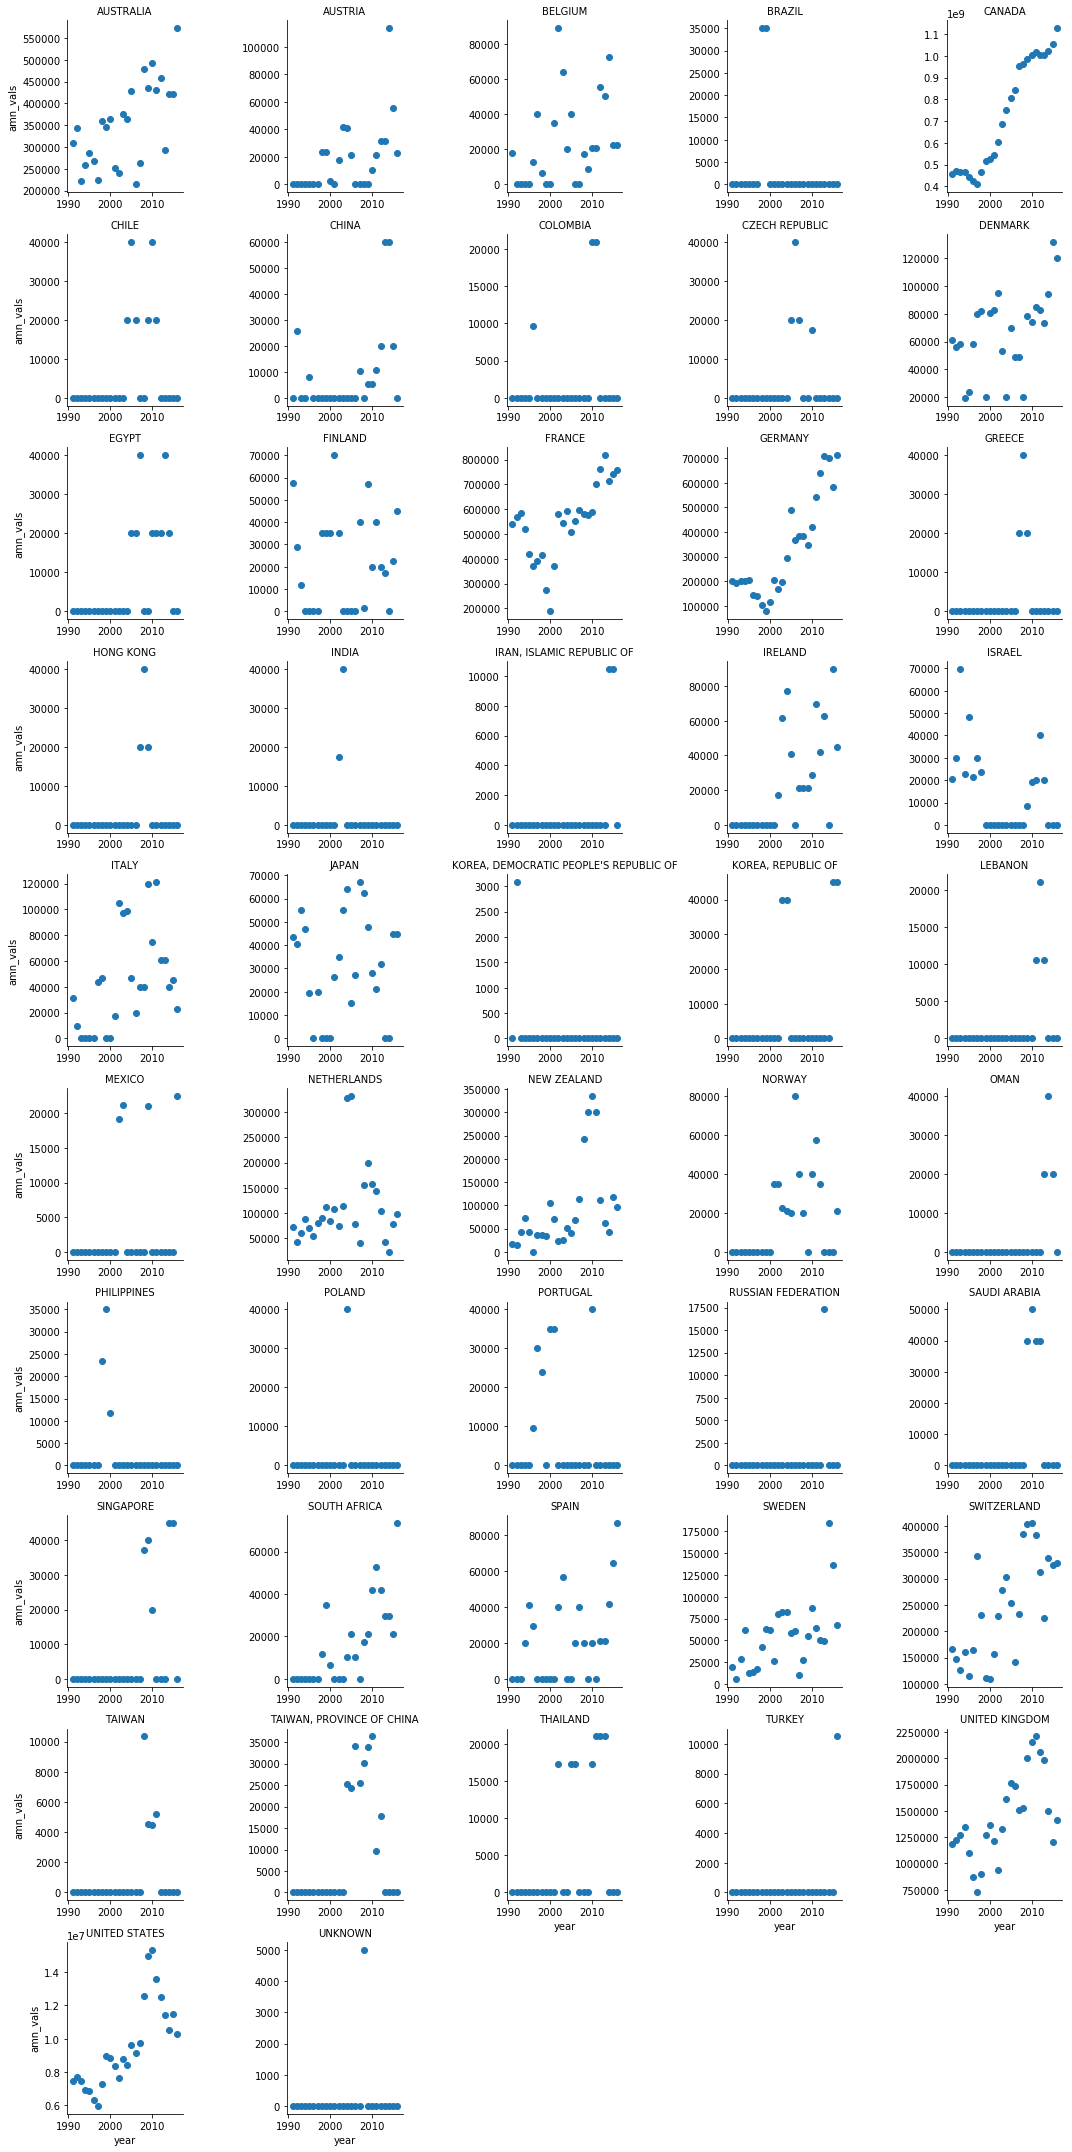

In [445]:
# need years that are index here to be in a column
df=df_award_per_country.copy()
df.reset_index(level=0, inplace=True)
df.rename(columns={'index':'year'},inplace=True)
# we melt the dataframe
df = df.melt('year', var_name='country',  value_name='amn_vals')

g_c = sns.FacetGrid(df, col="country", col_wrap=5,sharey=False,sharex=False)#, size=1.5)
g_c = g_c.map(plt.scatter, "year", "amn_vals").set_titles("{col_name}")#, marker=".")

 From above figures, we can see that
 
* Canada and USA: As expected, the researchers/institutions in Canada and USA receive a great amount of awards over the past years. The amount of awards in Canada is growing in years, however since 2010, the total amount of awards that is given to institutions in USA decresed from about 15 million dollar to 1 million dollars (30%) over the past 6 years.

* Other countries: There are other countries in the world in which the researchers were awarded by funding agency, NSERC. However, it seems there is no trend in the years.

### The amount of awards for each province over years

Let's look at the provinces to find out how they receive fundings in the past years.

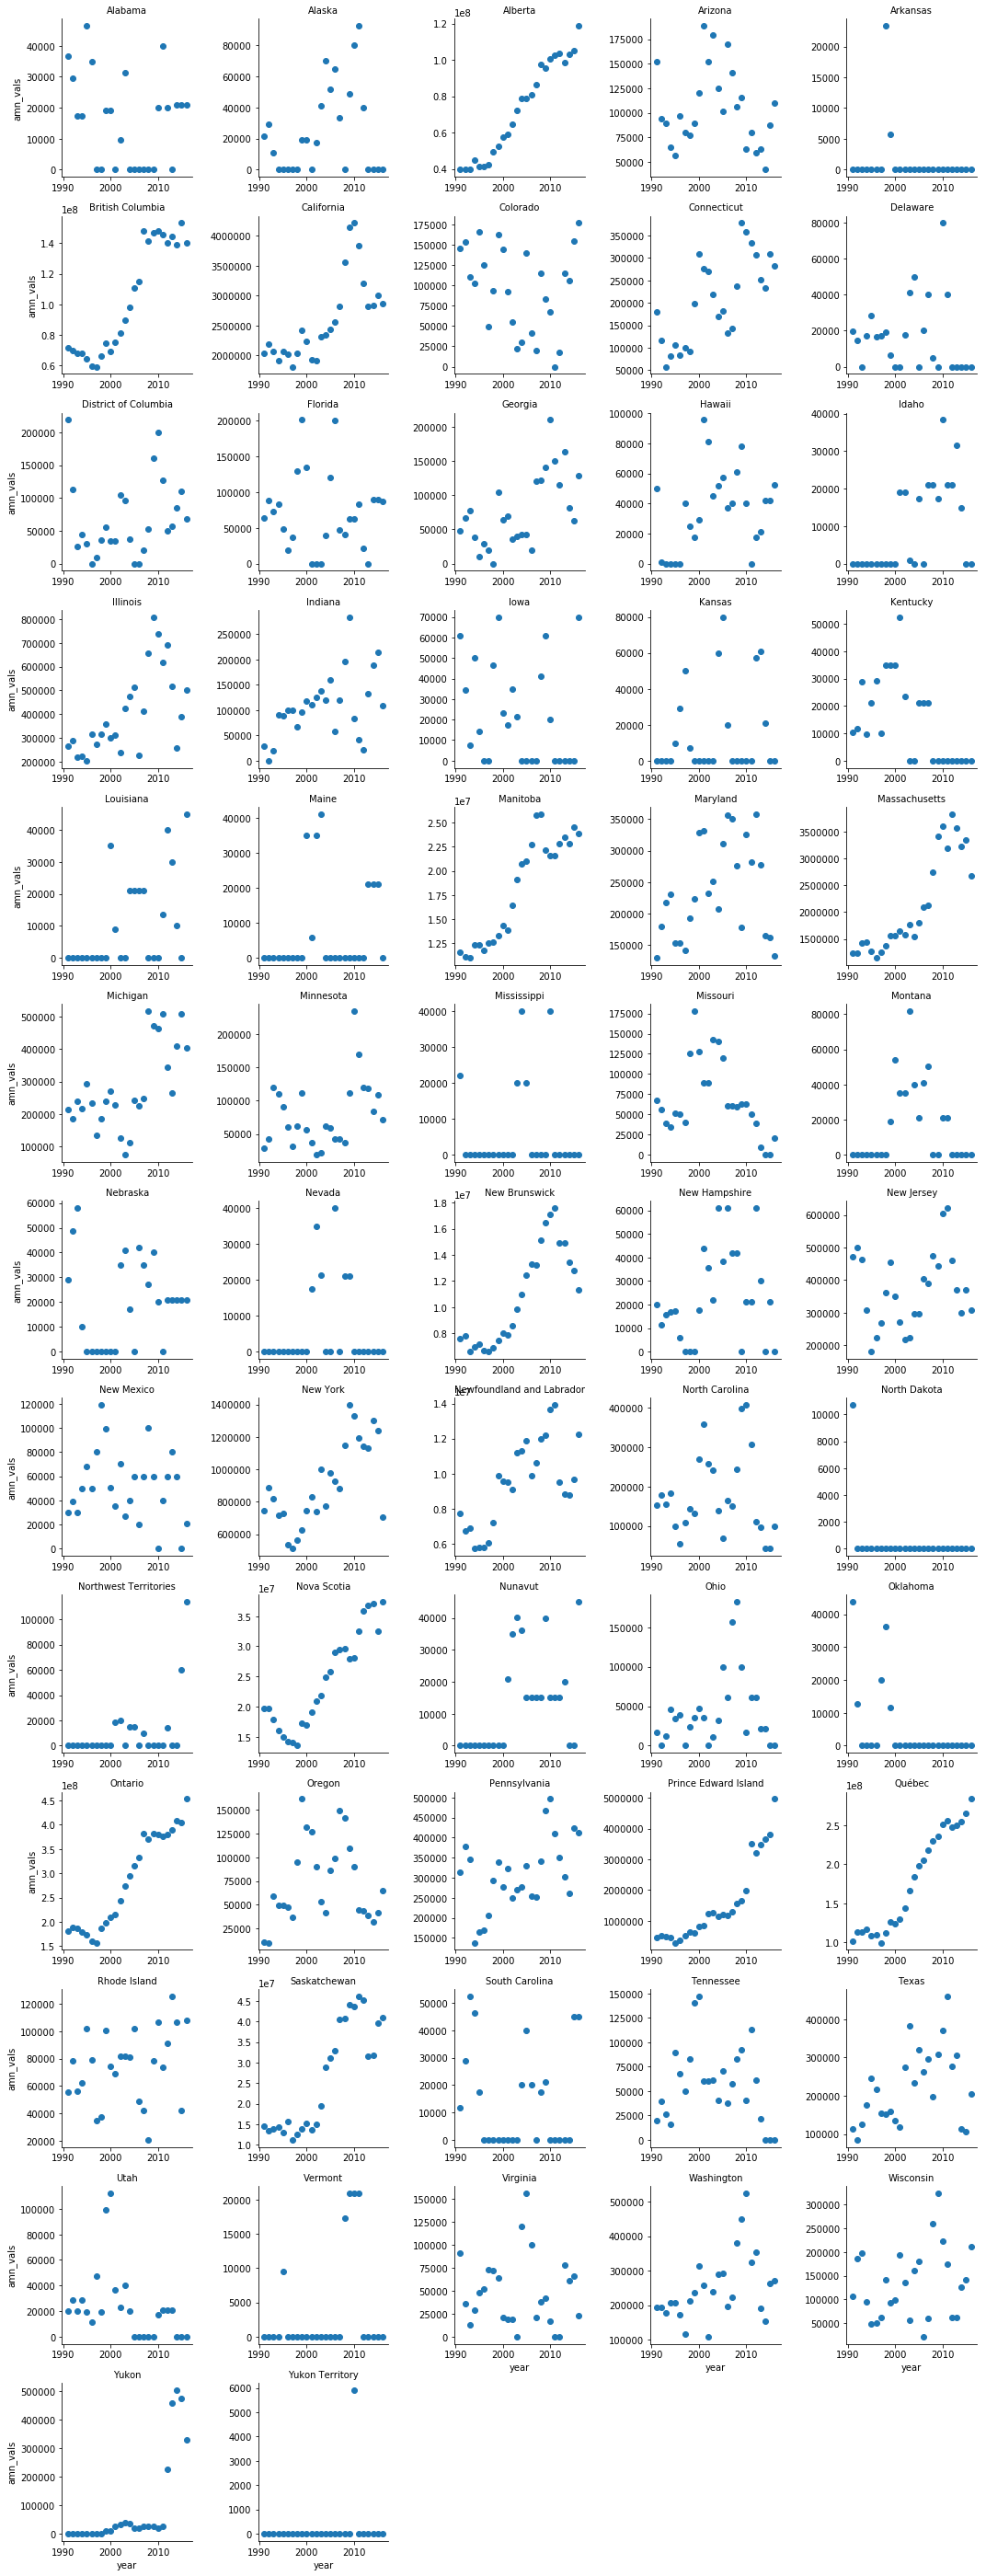

In [447]:
d={province:[] for province in all_provinces }    # Using Dictionay comprehension to make a defeault dictionary 

for dict_of_awards in award_for_provinces: #list of dicts
    for province in all_provinces:
    
        if province in dict_of_awards:
            d[province].append(dict_of_awards[province])
        else:
            d[province].append(0)   # put 0 if the subject was not in that year (was not awarded)
df_award_per_province=pd.DataFrame(d,index=years) # setting years as index

# need years that are index here to be in a column
df=df_award_per_province.copy()
df.reset_index(level=0, inplace=True)
df.rename(columns={'index':'year'},inplace=True)
# we melt the dataframe
df = df.melt('year', var_name='province',  value_name='amn_vals')

g_c = sns.FacetGrid(df, col="province", col_wrap=5,sharey=False,sharex=False)#, size=1.5)
g_c = g_c.map(plt.scatter, "year", "amn_vals").set_titles("{col_name}")#, marker=".")

From above graphs, we see that 
1) All major populated Canadian provinces (Ontario, Quebec, Alberta, Manitoba) are observing a continuous growth in the amount of awards receiving, except New Brunswick, Newfoundland, and Labrador, and just recently Saskatchewan that are receving less amount of awards in the past 4-6 years. The amount of awards that British Columbia received also remain almost the same since 2007 till 2016. Northwest teritories used to get less than 20,000 in total awards but in the past year the award increased to more than 10,000 dollars. Yukan has experienced a tremendous growth since 2012.

2) For most of the states in USA, the awards were given randomly. I mean no trend is actually observed. In other words, NSERC has probably no preference over the states, however the state of **Massachusetts** experienced a continuous growth. 

## Concluding remarks

This analysis study can be continued to look into more effects in deep. However, as this may get too long for the readers, I am going to cut it short for now. <br>

In future, we may come back to this to get more insight by analysing these data set.